In [1]:
from shutil import copyfile
import os
def split_dataset(source, training, testing, validation, split_size):

  file_names = os.listdir(source) 
  file_number = len(file_names) 

  for index, file in enumerate(file_names): 
      if index < split_size * file_number: 
        if index < 0.8 * file_number:
          copyfile(os.path.join(source, file), os.path.join(training, file))
        else:
          copyfile(os.path.join(source, file), os.path.join(validation, file))
      else: 
          copyfile(os.path.join(source, file), os.path.join(testing, file))

In [2]:
new_train_dir = r'D:\BRAIT\train'
new_test_dir = r'D:\BRAIT\test'
new_val_dir = r'D:\BRAIT\validation'

os.mkdir(new_train_dir)
os.mkdir(new_test_dir)
os.mkdir(new_val_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'D:\\BRAIT\\train'

In [3]:
source_dataset = r'D:\BRAIT\Braille Dataset'
dataset_list = os.listdir(source_dataset)

for data in dataset_list:
  print(data, " : ", str(len(os.listdir(os.path.join(source_dataset, data)))))
  os.mkdir(os.path.join(new_train_dir, data))
  os.mkdir(os.path.join(new_test_dir, data))
  os.mkdir(os.path.join(new_val_dir, data))

a  :  198


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'D:\\BRAIT\\train\\a'

In [4]:
split_size = .9

for dt in dataset_list:
  split_dataset(os.path.join(source_dataset, dt), os.path.join(new_train_dir, dt), os.path.join(new_test_dir, dt), os.path.join(new_val_dir, dt), split_size)

In [5]:
import os

In [8]:
path_train = r'D:\BRAIT\train'
path_test = r'D:\BRAIT\test'
path_val = r'D:\BRAIT\validation'

jmh_braille_train = os.listdir(path_train)
jmh_braille_test = os.listdir(path_test)
jmh_braille_val = os.listdir(path_val)

total_images = 0

for braille in jmh_braille_train:
  print(braille, " \t\t\t: ", len(os.listdir(os.path.join(path_train, braille)))+len(os.listdir(os.path.join(path_test, braille)))+len(os.listdir(os.path.join(path_val, braille))), " images")
  total_images += int(len(os.listdir(os.path.join(path_train, braille))))

print("Training Images : " + str(total_images))

a  			:  198  images
b  			:  227  images
c  			:  194  images
colon  			:  59  images
d  			:  240  images
e  			:  125  images
f  			:  124  images
g  			:  125  images
h  			:  125  images
i  			:  125  images
j  			:  125  images
k  			:  125  images
koma  			:  51  images
l  			:  126  images
m  			:  126  images
n  			:  125  images
o  			:  125  images
p  			:  125  images
petik_satu  			:  57  images
q  			:  125  images
r  			:  125  images
s  			:  126  images
semicolon  			:  58  images
space  			:  15  images
t  			:  125  images
tanda_hubung  			:  54  images
tanda_seru  			:  50  images
tanda_tanya  			:  55  images
titik  			:  54  images
u  			:  126  images
v  			:  125  images
w  			:  125  images
x  			:  125  images
y  			:  125  images
z  			:  125  images
Training Images : 3259


In [84]:
from keras_preprocessing.image import ImageDataGenerator

TARGET_SIZE = (150,150)
BATCH_SIZE = 32

TRAINING_DIR = r'D:\BRAIT\train'
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=False,
      fill_mode='nearest')

TESTING_DIR = r'D:\BRAIT\test'
testing_datagen = ImageDataGenerator(rescale=1./255)

VALIDATION_DIR = r'D:\BRAIT\validation'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=TARGET_SIZE,
	class_mode='categorical',
  batch_size=BATCH_SIZE,
  shuffle = True
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=TARGET_SIZE,
	class_mode='categorical',
  batch_size=BATCH_SIZE,
  shuffle=True
)

test_generator = testing_datagen.flow_from_directory(
    TESTING_DIR,
    target_size=TARGET_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 3259 images belonging to 35 classes.
Found 417 images belonging to 35 classes.
Found 389 images belonging to 35 classes.


In [85]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(35, activation='softmax')
])

In [86]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_400 (Conv2D)         (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_401 (Conv2D)         (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_402 (Conv2D)         (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 17, 17, 64)       

In [87]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), 
              metrics=['accuracy'])

In [88]:
history = model.fit(train_generator, 
                    epochs=50, 
                    steps_per_epoch=len(train_generator), 
                    validation_data = validation_generator, 
                    verbose = 1, 
                    validation_steps=len(validation_generator))

Epoch 1/50
102/102 [==============================] - 114s 1s/step - loss: 3.4842 - accuracy: 0.0522 - val_loss: 3.5111 - val_accuracy: 0.0719
Epoch 2/50
102/102 [==============================] - 107s 1s/step - loss: 3.1532 - accuracy: 0.1617 - val_loss: 3.5011 - val_accuracy: 0.2326
Epoch 3/50
102/102 [==============================] - 108s 1s/step - loss: 2.7714 - accuracy: 0.2725 - val_loss: 3.2449 - val_accuracy: 0.3070
Epoch 4/50
102/102 [==============================] - 106s 1s/step - loss: 2.6271 - accuracy: 0.3136 - val_loss: 2.7247 - val_accuracy: 0.3861
Epoch 5/50
102/102 [==============================] - 117s 1s/step - loss: 2.4996 - accuracy: 0.3612 - val_loss: 2.3673 - val_accuracy: 0.4652
Epoch 6/50
102/102 [==============================] - 136s 1s/step - loss: 2.3775 - accuracy: 0.3869 - val_loss: 2.1542 - val_accuracy: 0.5588
Epoch 7/50
102/102 [==============================] - 151s 1s/step - loss: 2.2639 - accuracy: 0.4207 - val_loss: 1.8630 - val_accuracy: 0.6019

In [89]:
history.history

{'loss': [3.484166383743286,
  3.1531920433044434,
  2.7713513374328613,
  2.627093553543091,
  2.4996418952941895,
  2.3774876594543457,
  2.263914108276367,
  2.1588099002838135,
  2.0886495113372803,
  2.000079393386841,
  1.8898382186889648,
  1.7973253726959229,
  1.7415820360183716,
  1.654524326324463,
  1.6257683038711548,
  1.5226809978485107,
  1.4826081991195679,
  1.4300873279571533,
  1.3619388341903687,
  1.3378782272338867,
  1.3196158409118652,
  1.2823041677474976,
  1.2445074319839478,
  1.2337369918823242,
  1.1595933437347412,
  1.1505368947982788,
  1.1323275566101074,
  1.107855200767517,
  1.072834849357605,
  1.0204968452453613,
  1.0553157329559326,
  0.9800915718078613,
  0.9942788481712341,
  0.9843796491622925,
  0.9149191975593567,
  0.9423216581344604,
  0.9247905015945435,
  0.8714146614074707,
  0.9006692171096802,
  0.8903281092643738,
  0.8428446054458618,
  0.844491183757782,
  0.868825376033783,
  0.849886953830719,
  0.8665227890014648,
  0.77170455

In [90]:
model.evaluate(test_generator)

13/13 [==============================] - 5s 352ms/step - loss: 0.8171 - accuracy: 0.8098


[0.8171367049217224, 0.8097686171531677]

In [91]:
model.save("Model_Braille")

INFO:tensorflow:Assets written to: Model_Braille\assets


INFO:tensorflow:Assets written to: Model_Braille\assets


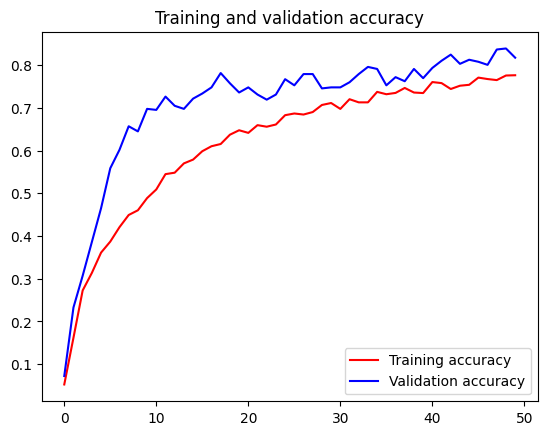

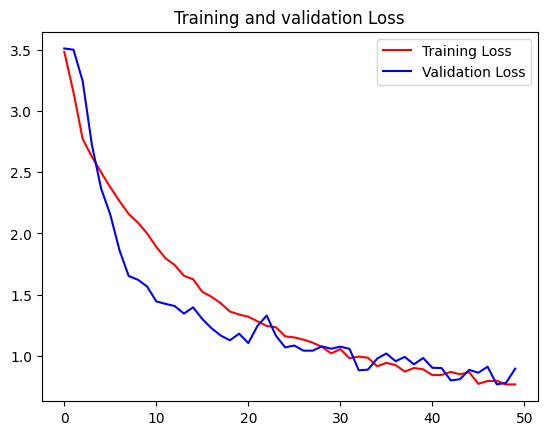

<Figure size 640x480 with 0 Axes>

In [92]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()